## Create pie charts for interview responses
Download the all-code-snippet file from Nvivo (or create a similarly structured file).  The columns are group, answer, count.  

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
from matplotlib import cm

In [2]:
#Opens the file dumped into the home directory
df = pd.read_csv('Documents\\Research\\Free_little_lib\\interviews\\interview.csv')
df['group'].unique()

array(['source', 'stocking', 'removes', 'expectations', 'use', 'general',
       'observedUse', 'relationship', 'unexpected', 'impetus'],
      dtype=object)

### Set up a dataframe for group categories and colors

In [3]:
groups = df['group'].unique()
colorname = ['Blues','Greens','Purples','Greys','Oranges','PuRd','YlGn','BuPu','PuBuGn','GnBu']
ref = pd.DataFrame({'group':groups,'color':colorname})

### Plot each pie chart
Two functions get the color or group and the other function fills the plots.

<function matplotlib.pyplot.show(*args, **kw)>

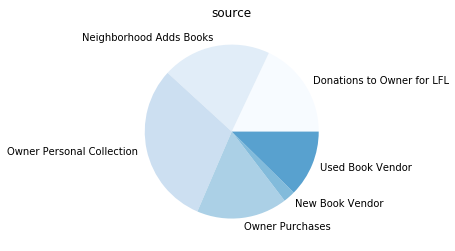

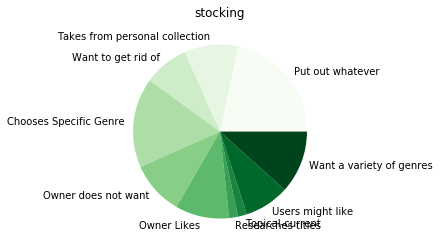

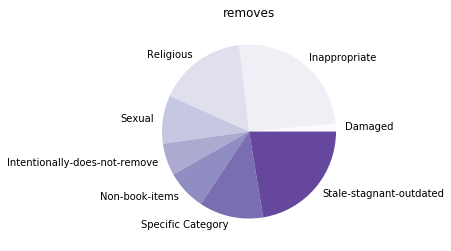

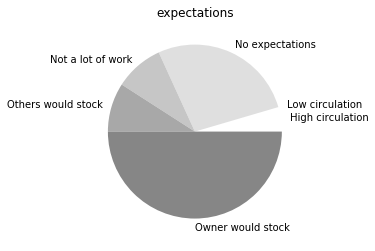

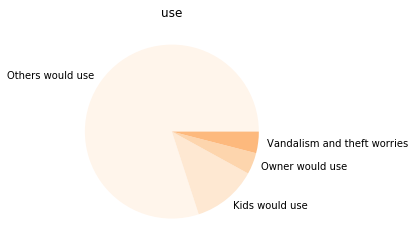

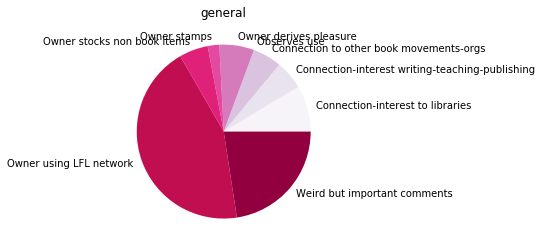

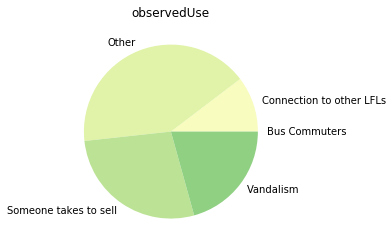

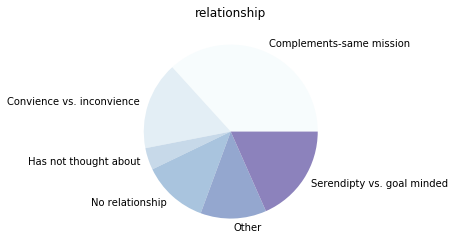

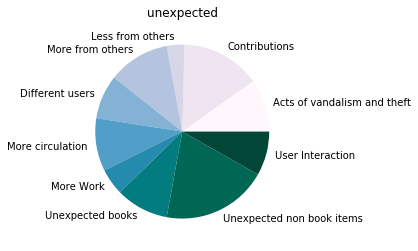

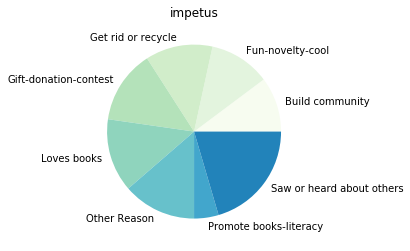

In [4]:
def getColor(v):
    return ref.iloc[v]['color']

def getGroup(g):
    return ref.iloc[g]['group']

#https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python

def loop_plot(ref):
    figs={}
    axs={}
    for idx, r in enumerate(ref.T):  #I have no idea why this had to be transposed...
        figs[idx]=plt.figure(idx)
        sub = df[df['group'] == getGroup(idx)]    
        cmap=plt.cm.get_cmap(getColor(idx))
        cs = cmap(np.arange(len(ref))/9.)
        #cs=cm.Blues(np.arange(8)/8.) This is another way to get colors
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].pie(sub['count'], colors=cs, labels=sub['answer'])
        plt.title(getGroup(idx))
    return figs, axs

figs, axs = loop_plot(ref)
plt.show